## **Project 1**: *Data PreProcessing*


Using a Python version 3.10 or newer
1. Update pip: `python -m pip install --upgrade pip`
1. Install the requirements `pip install -r requirements.txt`

You will now have the required dependencies to run our Python app.

- pandas
- numpy
- matplotlib
- ipykernal (for Jupiter notebook)

### Exploring Data Preprocessing Topics

- Missing Values
- Duplicate Data
- Outliers
- Aggregation
- Discretization
- Principle Components Analysis
- Sampling
- Testing/Training Split
- Saving a dataframe
- Dropping fields
- Means and Standard Deviation
- Concatenating Rows and Columns
- Calculated Fields
- Feature Normalization
- Shuffling dataframes
- Sorting dataframes

**Description Of The Attributes**
| Column      | Description                                                                                                      |
|-------------|------------------------------------------------------------------------------------------------------------------|
| age         | Age in years                                                                                                     |
| sex         | Sex (1 = male; 0 = female)                                                                                       |
| cp          | Chest pain type (0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic)                    |
| trestbps    | Resting blood pressure (in mm Hg on admission to the hospital)                                                   |
| chol        | Serum cholesterol in mg/dl                                                                                       |
| fbs         | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)                                                            |
| restecg     | Resting electrocardiograph results (0: normal, 1: ST-T wave abnormality, 2: probable or definite LV hypertrophy) |
| thalach     | Maximum heart rate achieved                                                                                      |
| exang       | Exercise induced angina (1 = yes; 0 = no)                                                                        |
| oldpeak     | ST depression induced by exercise relative to rest                                                               |
| slope       | The slope of the peak exercise ST segment (0: upsloping, 1: flat, 2: downsloping)                                |
| ca          | Number of major vessels (0-3) colored by fluoroscope                                                             |
| thal        | 0 = normal; 1 = fixed defect; 2 = reversible defect                                                              |
| condition   | 0 = no disease, 1 = disease                                                                                      |


##### Duplicate Data, Missing Values, Outliers

Number of instances = 303
Number of attributes = 13
       age   sex    cp  trestbps   chol    fbs  restecg  thalach  exang  \
0    67.00   1.0   4.0     160.0  286.0    0.0      2.0    108.0    1.0   
1    67.00   1.0   4.0     120.0  229.0    0.0      2.0    129.0    1.0   
2    37.00   1.0   3.0     130.0  250.0    0.0      0.0    187.0    0.0   
3    41.00   0.0   2.0     130.0  204.0    0.0      2.0    172.0    0.0   
4    56.00   1.0   2.0     120.0  236.0    0.0      0.0    178.0    0.0   
..     ...   ...   ...       ...    ...    ...      ...      ...    ...   
298  45.00   1.0   1.0     110.0  264.0    0.0      0.0    132.0    0.0   
299  68.00   1.0   4.0     144.0  193.0    1.0      0.0    141.0    0.0   
300  57.00   1.0   4.0     130.0  131.0    0.0      0.0    115.0    1.0   
301   3.14  10.0  69.0       9.0  100.0  123.0      9.0     23.0   10.0   
302  38.00   1.0   3.0     138.0  175.0    0.0      0.0    173.0    0.0   

     oldpeak  slope    ca thal  
0        1.5  

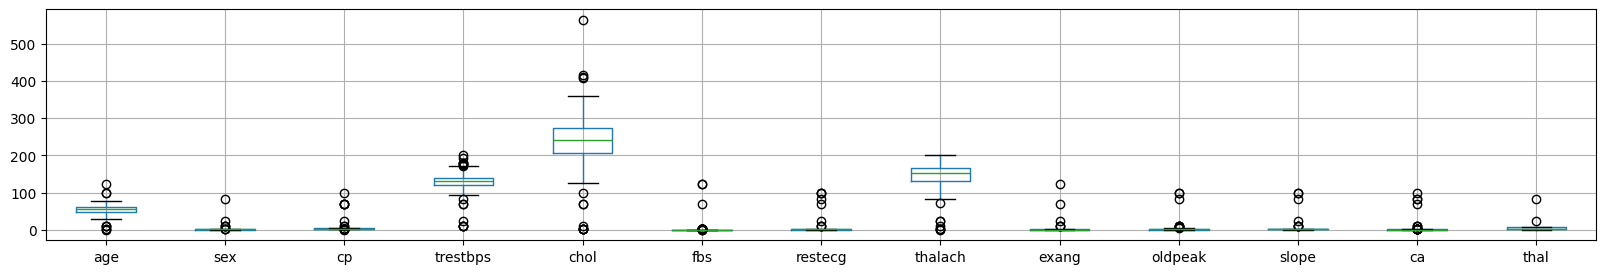

Number of rows before removing outliers = 302
Number of rows after removing outliers = 292
          age       sex        cp  trestbps      chol       fbs  restecg  \
0    1.051598 -0.029498 -0.048061  1.305228  0.725935 -0.111916 -0.05339   
1    1.051598 -0.029498 -0.048061 -0.376781 -0.175077 -0.111916 -0.05339   
2   -1.345679 -0.029498 -0.153721  0.043721  0.156875 -0.111916 -0.22492   
3   -1.026042 -0.229151 -0.259380  0.043721 -0.570258 -0.111916 -0.05339   
4    0.172596 -0.029498 -0.259380 -0.376781 -0.064427 -0.111916 -0.22492   
..        ...       ...       ...       ...       ...       ...      ...   
297  0.252506 -0.229151 -0.048061  0.464223  0.014610 -0.111916 -0.22492   
298 -0.706405 -0.029498 -0.365040 -0.797283  0.378176 -0.111916 -0.22492   
299  1.131507 -0.029498 -0.048061  0.632424 -0.744138 -0.018688 -0.22492   
300  0.252506 -0.029498 -0.048061  0.043721 -1.724186 -0.111916 -0.22492   
302 -1.265770 -0.029498 -0.153721  0.380123 -1.028668 -0.111916 -0.22492 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

data = pd.read_csv('data/heart_disease.csv')
data.columns = ['age', 'sex', 'cp', 'trestbps',
                'chol', 'fbs', 'restecg', 'thalach',
                'exang', 'oldpeak', 'slope', 'ca',
                'thal', 'disease']
data = data.drop(['disease'],axis=1)

# Shape of the dataset
print(f'Number of instances = {data.shape[0]}')
print(f'Number of attributes = {data.shape[1]}')
print(data)

# Duplicate Data
dups = data.duplicated()
print(f'Number of duplicate rows = {dups.sum()}\n')
print('Removing duplicate rows\n')
data2 = data.drop_duplicates()
print(f'Number of instances after dropping duplicates = {data2.shape[0]}')
print(data2)

# Missing Values replace with NaN
data3 = data2.replace('?', np.nan)

# Convert columns to numeric, coercing errors
for col in data3.columns:
    data3[col] = pd.to_numeric(data3[col], errors='coerce')
    
print(data3)

print('Number of missing values:')
for col in data3.columns:
    print(f'\t{col}: {data3[col].isna().sum()}')

# Missing Values replace with Median value of attribute
print('Replace missing values with median')
for col in data3.columns:
    column = f'{col}'
    datacol = data3[column]
    data3[column] = datacol.fillna(datacol.median())

# Missing Values recount and print dataset
print('Number of missing values:')
for col in data3.columns:
    print(f'\t{col}: {data3[col].isna().sum()}')
print(data3)

# Outliers
for col in data3.columns:
    column = f'{col}'
    datacol = data3[column]
    data3[col] = pd.to_numeric(data3[column])

data3.boxplot(figsize=(20,3))
plt.show()

Z = (data3-data3.mean())/data3.std()
print(f'Number of rows before removing outliers = {Z.shape[0]}')
Z2 = Z.loc[((Z > -3).sum(axis=1)==13) & ((Z <= 3).sum(axis=1)==13),:]
print(f'Number of rows after removing outliers = {Z2.shape[0]}')
print(Z2)